# Project 3: Web APIs & NLP - 04

Kelly Slatery | US-DSI-10 | 01.31.2020

In [134]:
# Imports
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC

In [2]:
# Set viewing options
pd.set_option('display.max_columns', 10000)

# Import data

In [3]:
submissions = pd.read_csv('./data/submissions.csv')

In [4]:
comments = pd.read_csv('./data/comments.csv')

# Explore Vectorizing Hyperparameters

## Submissions

In [11]:
# Code credits: Benjamin Peck - GA US-DSI-10 DC

# Define X and y
X = submissions['all_text']
y = submissions['subreddit']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.33, 
                                                    random_state=42)

# Parameters: CountVectorizer, ngram_range=(1,2), max_df=.95
cvec = CountVectorizer(ngram_range=(1,2), max_df=.95)
cvec.fit(X_train)
X_train = cvec.transform(X_train)

X_train_df = pd.DataFrame(X_train.toarray(),
                          columns=cvec.get_feature_names())


In [12]:
X_train_df.sum().sort_values(ascending=False).head(10)

the     37097
to      16537
and     16387
of      16027
it      12477
in      11056
is       8815
this     7637
you      7552
on       7176
dtype: int64

Definitely exclude stopwords. Try max_features, too.

In [13]:
# Redefine X and resplit data
X = submissions['all_text']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

# CountVectorizer, stop_words='english', max_features=100
cvec = CountVectorizer(stop_words='english', max_features=100)
cvec.fit(X_train)
X_train = cvec.transform(X_train)

X_train_df = pd.DataFrame(X_train.toarray(),
                          columns=cvec.get_feature_names())

In [14]:
X_train_df.sum().sort_values(ascending=False).head(20)

queen       5958
beatles     5695
song        3976
album       3797
like        3539
freddie     3462
just        3311
songs       2970
love        2861
john        2834
paul        2552
know        2419
think       2178
live        1880
favorite    1767
don         1758
ve          1734
time        1696
good        1671
really      1611
dtype: int64

Now things are getting interesting. The words "favorite", "good", "really", "like" and "love" all appeared here, which can be used maybe as an indicator of either band's popularity. This looks better, but try max_df and min_df this time to rule out words that appear in too many documents.

In [15]:
# Redefine X and resplit data
X = submissions['all_text']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

# CountVectorizer, stop_words='english', max_features=100, max_df=.95, min_df=.05
cvec = CountVectorizer(stop_words='english', max_features=100, max_df=.95, min_df=.05)
cvec.fit(X_train)
X_train = cvec.transform(X_train)

X_train_df = pd.DataFrame(X_train.toarray(),
                          columns=cvec.get_feature_names())

In [16]:
X_train_df.sum().sort_values(ascending=False).head(20)

queen      5958
beatles    5695
song       3976
album      3797
like       3539
freddie    3462
just       3311
songs      2970
love       2861
john       2834
paul       2552
know       2419
think      2178
don        1758
dtype: int64

Only returns 14 words. This must mean that only 14 words appear in >5% and <95% of documents. Try removing max_df and min_df, but adjusting ngram_range!

In [17]:
# Redefine X and resplit data
X = submissions['all_text']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

# CountVectorizer, stop_words='english', max_features=100, ngram_range(1,3)
cvec = CountVectorizer(stop_words='english', max_features=100, ngram_range=(1,3))
cvec.fit(X_train)
X_train = cvec.transform(X_train)

X_train_df = pd.DataFrame(X_train.toarray(),
                          columns=cvec.get_feature_names())

In [18]:
X_train_df.sum().sort_values(ascending=False).head(20)

queen       5958
beatles     5695
song        3976
album       3797
like        3539
freddie     3462
just        3311
songs       2970
love        2861
john        2834
paul        2552
know        2419
think       2178
live        1880
favorite    1767
don         1758
ve          1734
time        1696
good        1671
really      1611
dtype: int64

Try the same with the max_df and min_df hyperparameters.

In [19]:
# Redefine X and resplit data
X = submissions['all_text']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

# CountVectorizer, stop_words='english', max_features=100, 
# max_df=.95, min_df=.05, ngram_range(1,3)
cvec = CountVectorizer(stop_words='english', max_df=.95, min_df=.05, 
                       max_features=100, ngram_range=(1,3))
cvec.fit(X_train)
X_train = cvec.transform(X_train)

X_train_df = pd.DataFrame(X_train.toarray(),
                          columns=cvec.get_feature_names())

In [20]:
X_train_df.sum().sort_values(ascending=False).head(20)

queen      5958
beatles    5695
song       3976
album      3797
like       3539
freddie    3462
just       3311
songs      2970
love       2861
john       2834
paul       2552
know       2419
think      2178
don        1758
dtype: int64

This only returns 14 words again. Look at end of the list.

In [21]:
X_train_df.sum().sort_values(ascending=False).tail(20)

queen      5958
beatles    5695
song       3976
album      3797
like       3539
freddie    3462
just       3311
songs      2970
love       2861
john       2834
paul       2552
know       2419
think      2178
don        1758
dtype: int64

Apparently this dataset does not contain many words that appear either not extremely frequently or not extremely sparsely across both subreddits. Might mean that most words are unique to the subreddit? Or may indicate that there won't be many strong predictors for subreddit? Try increasing ngram_range.

In [22]:
# Redefine X and resplit data
X = submissions['all_text']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

# CountVectorizer, stop_words='english', max_features=100, 
# max_df=.95, min_df=.05, ngram_range(1,5)
cvec = CountVectorizer(stop_words='english', max_df=.95, min_df=.05, 
                       max_features=100, ngram_range=(1,5))
cvec.fit(X_train)
X_train = cvec.transform(X_train)

X_train_df = pd.DataFrame(X_train.toarray(),
                          columns=cvec.get_feature_names())

In [23]:
X_train_df.sum().sort_values(ascending=False).head(20)

queen      5958
beatles    5695
song       3976
album      3797
like       3539
freddie    3462
just       3311
songs      2970
love       2861
john       2834
paul       2552
know       2419
think      2178
don        1758
dtype: int64

Try on a Tfidf vectorizer to see if we can get any more words. Exclude hyperparameters max_df and min_df.

In [24]:
# Redefine X and resplit data
X = submissions['all_text']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

# Parameters: Tfidf, stop_words='english', max_features=100, ngram_range=(1,5)
tvec = TfidfVectorizer(stop_words='english', max_features=100, ngram_range=(1,5))
tvec.fit(X_train)
X_train = tvec.transform(X_train)

X_train_df = pd.DataFrame(X_train.toarray(),
                          columns=tvec.get_feature_names())

In [25]:
X_train_df.sum().sort_values(ascending=False).head(20)

beatles     1886.489083
queen       1826.466735
freddie     1154.567234
john         963.962467
song         960.207850
paul         888.150860
album        870.035433
just         849.385188
like         801.153753
love         749.070382
know         640.352282
songs        639.029800
live         581.841990
think        553.496659
favorite     534.915588
new          515.543446
george       511.466247
cover        508.716886
brian        502.508013
rhapsody     500.583565
dtype: float64

Things are even more interesting. Here, we also get the next most popular memeber of either band and "rhapsody" from Queen's geatest hit, "Bohemian Rhapsody", and the recent Queen film named after the song. Try with higher max_features hyperparameter and ngram_range=(1,2).

In [26]:
# Redefine X and resplit data
X = submissions['all_text']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

# Parameters: Tfidf, stop_words='english', max_features=200, ngram_range=(1,2)
tvec = TfidfVectorizer(stop_words='english', max_features=200, ngram_range=(1,2))
tvec.fit(X_train)
X_train = tvec.transform(X_train)

X_train_df = pd.DataFrame(X_train.toarray(),
                          columns=tvec.get_feature_names())

In [27]:
X_train_df.sum().sort_values(ascending=False).head(20)

beatles     1614.644400
queen       1578.579878
freddie     1033.163416
john         869.531262
song         818.521680
paul         800.126365
album        746.392164
just         717.828836
like         675.807026
love         649.757306
know         550.367331
songs        542.389767
think        477.064094
live         470.343169
favorite     464.765068
brian        460.604249
cover        451.837465
rhapsody     450.767763
new          446.873772
george       435.680004
dtype: float64

Try Tfidf one more time with ngram_range=(1,4).

In [28]:
# Redefine X and resplit data
X = submissions['all_text']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

# Parameters: Tfidf, stop_words='english', max_features=200, ngram_range=(1,4)
tvec = TfidfVectorizer(stop_words='english', max_features=200, ngram_range=(1,4))
tvec.fit(X_train)
X_train = tvec.transform(X_train)

X_train_df = pd.DataFrame(X_train.toarray(),
                          columns=tvec.get_feature_names())

In [29]:
X_train_df.sum().sort_values(ascending=False).head(20)

beatles     1614.644400
queen       1578.579878
freddie     1033.163416
john         869.531262
song         818.521680
paul         800.126365
album        746.392164
just         717.828836
like         675.807026
love         649.757306
know         550.367331
songs        542.389767
think        477.064094
live         470.343169
favorite     464.765068
brian        460.604249
cover        451.837465
rhapsody     450.767763
new          446.873772
george       435.680004
dtype: float64

Same as above. If using same features below, use TFIDFVectorizer with ngram_range=(1,2) to account for song titles or other appraisals of songs/band quality.

## Tokenized features

In [30]:
# Redefine X and resplit data
X = submissions['tokenized_all_text']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

# Parameters: Tfidf, stop_words='english', max_features=200, ngram_range=(1,2)
tvec = TfidfVectorizer(stop_words='english', max_features=200, ngram_range=(1,2))
tvec.fit(X_train)
X_train = tvec.transform(X_train)

X_train_df = pd.DataFrame(X_train.toarray(),
                          columns=tvec.get_feature_names())

In [31]:
X_train_df.sum().sort_values(ascending=False).head(20)

beatles     1592.529864
queen       1557.801341
freddie     1027.216092
john         859.521241
song         811.963764
paul         793.425225
album        740.342008
just         712.336126
like         670.526623
love         643.339190
know         545.480566
songs        535.558398
live         480.885690
think        473.724603
brian        454.852055
cover        449.128473
rhapsody     447.971614
new          442.054450
bohemian     433.481058
george       431.784790
dtype: float64

Returns approximately same list as above using original text (order varies slightly).

## Stemmatized features

In [32]:
# Redefine X and resplit data
X = submissions['stemmatized_tokenized_all_text']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

# Parameters: Tfidf, stop_words='english', max_features=200, ngram_range=(1,4)
tvec = TfidfVectorizer(stop_words='english', max_features=200, ngram_range=(1,4))
tvec.fit(X_train)
X_train = tvec.transform(X_train)

X_train_df = pd.DataFrame(X_train.toarray(),
                          columns=tvec.get_feature_names())

In [33]:
X_train_df.sum().sort_values(ascending=False).head(20)

beatl       1550.064589
thi         1519.505267
queen       1457.214792
song        1033.796842
freddi       990.337374
album        826.321937
john         806.828264
wa           786.392758
paul         739.195429
love         683.456928
just         639.012384
like         632.487864
know         529.583599
live         508.940201
cover        501.005068
think        469.975056
hi           466.110825
day          439.373653
rhapsodi     432.387646
georg        430.724119
dtype: float64

This doesn't work well as stop words weren't removed before stemmatizing. In addition, even with stemmatizing, we got about the same apread of words.

## Important features by subreddit

In [34]:
# Use ['all_text'] as feature because there was negligible difference

# Beatles subreddit

# Redefine X and y and resplit data
X = submissions.loc[submissions['subreddit']==1, 'all_text']
y = submissions.loc[submissions['subreddit']==1, 'subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

# Parameters: Tfidf, stop_words='english', max_features=200, ngram_range=(1,2)
tvec = TfidfVectorizer(stop_words='english', max_features=200, ngram_range=(1,2))
tvec.fit(X_train)
X_train = tvec.transform(X_train)

X_train_df = pd.DataFrame(X_train.toarray(),
                          columns=tvec.get_feature_names())


In [35]:
X_train_df.sum().sort_values(ascending=False).head(20)

beatles           1345.086343
paul               730.681924
john               639.445936
album              481.971823
song               423.825300
george             398.134209
just               382.810765
ringo              348.946499
like               348.070276
lennon             330.265402
mccartney          322.423354
songs              298.850863
know               293.109068
love               293.026019
cover              259.435330
new                254.826316
think              244.288262
favorite           244.272047
paul mccartney     239.438906
got                238.801745
dtype: float64

In [36]:
# Queen subreddit

# Redefine X and y and resplit data
X = submissions.loc[submissions['subreddit']==0, 'all_text']
y = submissions.loc[submissions['subreddit']==0, 'subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

# Parameters: Tfidf, stop_words='english', max_features=200, ngram_range=(1,2)
tvec = TfidfVectorizer(stop_words='english', max_features=200, ngram_range=(1,2))
tvec.fit(X_train)
X_train = tvec.transform(X_train)

X_train_df = pd.DataFrame(X_train.toarray(),
                          columns=tvec.get_feature_names())


In [37]:
X_train_df.sum().sort_values(ascending=False).head(20)

queen                1291.302237
freddie               927.981000
brian                 418.573633
rhapsody              411.088819
bohemian              401.419922
mercury               396.391251
song                  384.444206
bohemian rhapsody     382.732644
just                  360.700565
freddie mercury       348.368627
love                  337.698831
like                  334.623431
live                  331.719127
know                  256.577398
songs                 236.157179
best                  227.772689
album                 225.424326
think                 225.350771
favorite              217.704215
roger                 216.701616
dtype: float64

Try with CountVectorizer to see if there is a substantial difference.

In [38]:
# Beatles subreddit

# Redefine X and y and resplit data
X = submissions.loc[submissions['subreddit']==1, 'all_text']
y = submissions.loc[submissions['subreddit']==1, 'subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

# Parameters: CountVectorizer, stop_words='english', max_features=200, ngram_range=(1,2)
cvec = CountVectorizer(stop_words='english', max_features=200, ngram_range=(1,2))
cvec.fit(X_train)
X_train = cvec.transform(X_train)

X_train_df = pd.DataFrame(X_train.toarray(),
                          columns=cvec.get_feature_names())


In [39]:
X_train_df.sum().sort_values(ascending=False).head(20)

beatles      5782
album        3048
paul         2526
song         2346
john         2303
like         2022
just         1934
songs        1854
love         1367
know         1338
george       1220
think        1157
favorite     1151
ve           1036
ringo        1011
mccartney    1002
lennon        990
really        926
time          926
road          891
dtype: int64

In [40]:
# Queen subreddit

# Redefine X and y and resplit data
X = submissions.loc[submissions['subreddit']==0, 'all_text']
y = submissions.loc[submissions['subreddit']==0, 'subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

# Parameters: CountVectorizer, max_features=200, ngram_range=(1,2)
cvec = CountVectorizer(stop_words='english', max_features=200, ngram_range=(1,2))
cvec.fit(X_train)
X_train = cvec.transform(X_train)

X_train_df = pd.DataFrame(X_train.toarray(),
                          columns=cvec.get_feature_names())


In [41]:
X_train_df.sum().sort_values(ascending=False).head(20)

queen                5866
freddie              3242
song                 1950
live                 1535
like                 1508
just                 1505
love                 1466
rhapsody             1448
bohemian             1414
bohemian rhapsody    1369
songs                1233
brian                1139
mercury              1060
know                 1017
think                 986
album                 943
don                   908
freddie mercury       900
good                  882
best                  811
dtype: int64

Use 'all_text' for all further analysis. Try models with CountVectorizer and TFIDFVectorizer.

## Important features appearing < 1000 times

In [42]:
# Redefine X and y and resplit data
X = submissions['all_text']
y = submissions['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

# Parameters: Tfidf, max_features=200, ngram_range=(1,2), max_df=999
tvec = TfidfVectorizer(stop_words='english', max_features=200, ngram_range=(1,2), max_df=999)
tvec.fit(X_train)
X_train = tvec.transform(X_train)

X_train_df = pd.DataFrame(X_train.toarray(),
                          columns=tvec.get_feature_names())

In [43]:
X_train_df.sum().sort_values(ascending=False).head(20)

cover              525.503069
brian              507.358230
george             482.134788
mercury            480.709273
freddie mercury    422.481204
lennon             420.323838
ringo              402.920899
today              398.059043
mccartney          389.503787
does               379.753635
video              358.705365
rock               356.367008
let                333.821286
version            332.137438
life               331.147043
want               328.392838
roger              301.508815
guys               292.723035
years              292.550838
movie              286.581789
dtype: float64

The word "rock" is interesting--how will it help determine which subreddit a post comes from? What does that say about people's associations of the rock music genre with either band?

In [44]:
# Redefine X and y and resplit data
X = submissions['all_text']
y = submissions['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

# Parameters: CountVectorizer, max_features=200, ngram_range=(1,2), max_df=999
cvec = CountVectorizer(stop_words='english', max_features=200, ngram_range=(1,2), max_df=999)
cvec.fit(X_train)
X_train = cvec.transform(X_train)

X_train_df = pd.DataFrame(X_train.toarray(),
                          columns=cvec.get_feature_names())

In [45]:
X_train_df.sum().sort_values(ascending=False).head(20)

brian              1290
let                1277
want               1213
george             1201
life               1177
version            1127
rock               1107
mercury            1090
people             1073
does               1068
lennon             1060
mccartney          1036
cover              1012
great               991
10                  981
albums              974
ringo               942
freddie mercury     928
youtube             918
night               905
dtype: int64

I wonder if "let"'s popularity comes from "Let It Be", the Beatles hit. The word "youtube" comes from links and may be an interesting indicator if fans of either post more links to their music. The number 10 appears here, which seems odd.

# Logistic Regression - CountVectorizer

In [171]:
# Redefine X and y and resplit data
X = submissions['all_text']
y = submissions['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

In [172]:
# Set up pipeline
pipe_lr_c = Pipeline([
    ('cvec', CountVectorizer(stop_words='english', ngram_range=(1,2))),
    ('lr', LogisticRegression(solver='lbfgs', max_iter=5000))
])

# Set up pipeline params
pipe_lr_c_params = {
    'cvec__max_features': [200, 500],
}


In [173]:
# Set up a gridsearch
gs_lr_c = GridSearchCV(pipe_lr_c, pipe_lr_c_params, cv=5, verbose=1)

# Fit the gridsearch
gs_lr_c.fit(X_train, y_train);

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   15.3s finished


In [174]:
# Find best score
gs_lr_c.best_score_

0.854807583153593

In [175]:
# Find best parameters
gs_lr_c.best_params_

{'cvec__max_features': 500}

# Logistic Regression - TFIDFVectorizer

In [163]:
# Set up pipeline
pipe_lr_t = Pipeline([
    ('tvec', TfidfVectorizer(stop_words='english', ngram_range=(1,2))),
    ('lr', LogisticRegression(solver='lbfgs', max_iter=5000))
])

# Set up pipeline params
pipe_lr_t_params = {
    'tvec__max_features': [200, 500],
}


In [164]:
# Set up a gridsearch
gs_lr_t = GridSearchCV(pipe_lr_t, pipe_lr_t_params, cv=5, verbose=1)

# Fit the gridsearch
gs_lr_t.fit(X_train, y_train);

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   15.4s finished


In [165]:
# Find best score
gs_lr_t.best_score_

0.855337344382639

In [166]:
# Find best parameters
gs_lr_t.best_params_

{'tvec__max_features': 500}

## K-Nearest Neighbors - CountVectorizer

In [57]:
# Set up pipeline
pipe_knn_c = Pipeline([
    ('cvec', CountVectorizer(stop_words='english', max_features=200, ngram_range=(1,2))),
    ('knn', KNeighborsClassifier())
])


# Set up pipeline params
pipe_knn_c_params = {
    'cvec__max_features': [200, 500],
    'knn__n_neighbors':[5, 15, 25, 35, 45],
    'knn__p': [1, 2]
}


In [58]:
# Set up a gridsearch
gs_knn_c = GridSearchCV(pipe_knn_c, pipe_knn_c_params, cv=5, verbose=1)

# Fit the gridsearch
gs_knn_c.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 12.7min finished


In [59]:
# Find best score
gs_knn_c.best_score_

0.8311575282854656

In [60]:
# Find best parameters
gs_knn_c.best_params_

{'cvec__max_features': 500, 'knn__n_neighbors': 25, 'knn__p': 1}

Stop testing max_features because it's always 500.

# K-Nearest Neighbors - TFIDFVectorizer

In [63]:
# Set up pipeline
pipe_knn_t = Pipeline([
    ('tvec', TfidfVectorizer(stop_words='english', max_features=500, ngram_range=(1,2))),
    ('knn', KNeighborsClassifier())
])


# Set up pipeline params
pipe_knn_t_params = {
    'knn__n_neighbors':[5, 15, 25, 35, 45],
    'knn__p': [1, 2]
}


In [64]:
# Set up a gridsearch
gs_knn_t = GridSearchCV(pipe_knn_t, pipe_knn_t_params, cv=5, verbose=1)

# Fit the gridsearch
gs_knn_t.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.4min finished


In [65]:
# Find best score
gs_knn_t.best_score_

0.7762894009914103

In [66]:
# Find best parameters
gs_knn_t.best_params_

{'knn__n_neighbors': 15, 'knn__p': 2}

## Random Forest - CountVectorizer

In [75]:
# Set up pipeline
pipe_rf_c = Pipeline([
    ('cvec', CountVectorizer(stop_words='english', max_features=500, ngram_range=(1,2))),
    ('rf', RandomForestClassifier())
])

# Set up pipeline parameters
pipe_rf_c_params = {
    'rf__n_estimators': [100, 150, 200],
    'rf__max_depth': [None, 5, 6], 
    'rf__max_features': ['auto', 'log2'],
    'rf__min_samples_split': [2, 50]
}

In [76]:
# Set up a gridsearch
gs_rf_c = GridSearchCV(pipe_rf_c, pipe_rf_c_params, cv=5, verbose=1)

# Fit the gridsearch
gs_rf_c.fit(X_train, y_train);

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed: 14.2min finished


In [77]:
# Find best score
gs_rf_c.best_score_

0.8582888712301813

In [78]:
# Find best parameters
gs_rf_c.best_params_

{'rf__max_depth': None,
 'rf__max_features': 'log2',
 'rf__min_samples_split': 50,
 'rf__n_estimators': 200}

## Random Forest - TFIDFVectorizer

In [81]:
# Set up pipeline
pipe_rf_t = Pipeline([
    ('tvec', TfidfVectorizer(stop_words='english', max_features=500, ngram_range=(1,2))),
    ('rf', RandomForestClassifier())
])

# Set up pipeline parameters
pipe_rf_t_params = {
    'rf__n_estimators': [100, 150, 200],
    'rf__max_depth': [None, 5, 6], 
    'rf__max_features': ['auto', 'log2'],
    'rf__min_samples_split': [2, 50, 100]
}

In [82]:
# Set up a gridsearch
gs_rf_t = GridSearchCV(pipe_rf_t, pipe_rf_t_params, cv=5, verbose=1)

# Fit the gridsearch
gs_rf_t.fit(X_train, y_train);

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed: 20.2min finished


In [83]:
# Find best score
gs_rf_t.best_score_

0.8566617474552541

In [84]:
# Find best parameters
gs_rf_t.best_params_

{'rf__max_depth': None,
 'rf__max_features': 'log2',
 'rf__min_samples_split': 50,
 'rf__n_estimators': 100}

## Multinomial Naive Bayes - CountVectorizer

In [283]:
# Set up pipeline
pipe_mnb_c = Pipeline([
    ('cvec', CountVectorizer(stop_words='english', max_features=500, ngram_range=(1,2))),
    ('mnb', MultinomialNB())
])

# Set up pipeline parameters
pipe_mnb_c_params = {
    'mnb__alpha': [1.0, 0, .01], 
    'mnb__fit_prior': [True, False]
}

In [284]:
# Set up a gridsearch
gs_mnb_c = GridSearchCV(pipe_mnb_c, pipe_mnb_c_params, cv=5, verbose=1)

# Fit the gridsearch
gs_mnb_c.fit(X_train, y_train);

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/kelly/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/kelly/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/kelly/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/kelly/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/kelly/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/naive_b

In [285]:
# Find best score
gs_mnb_c.best_score_

0.8512127748136376

In [286]:
# Find best parameters
gs_mnb_c.best_params_

{'mnb__alpha': 1.0, 'mnb__fit_prior': False}

## Multinomial Naive Bayes - TFIDFVectorizer

In [98]:
# Set up pipeline
pipe_mnb_t = Pipeline([
    ('tvec', TfidfVectorizer(stop_words='english', max_features=500, ngram_range=(1,2))),
    ('mnb', MultinomialNB())
])

# Set up pipeline parameters
pipe_mnb_t_params = {
    'mnb__alpha': [1.0, 0, .01], 
    'mnb__fit_prior': [True, False]
}

In [99]:
# Set up a gridsearch
gs_mnb_t = GridSearchCV(pipe_mnb_t, pipe_mnb_t_params, cv=5, verbose=1)

# Fit the gridsearch
gs_mnb_t.fit(X_train, y_train);

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/kelly/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/kelly/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/kelly/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/kelly/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/kelly/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/naive_b

In [100]:
# Find best score
gs_mnb_t.best_score_

0.8537102206077118

In [101]:
# Find best parameters
gs_mnb_t.best_params_

{'mnb__alpha': 1.0, 'mnb__fit_prior': False}

## Bagging Classifier - TFIDFVectorizer

In [274]:
# Set up pipeline
pipe_bc_c = Pipeline([
    ('cvec', CountVectorizer(stop_words='english', max_features=500, ngram_range=(1,2))),
    ('bc', BaggingClassifier())
])

# Set up pipeline parameters
pipe_bc_c_params = {
    'bc__n_estimators': [20, 30, 40], 
    'bc__max_samples': [.25, .33, .5], 
}

In [280]:
# Set up a gridsearch
gs_bc_c = GridSearchCV(pipe_bc_c, pipe_bc_c_params, cv=5, verbose=1)

# Fit the gridsearch
gs_bc_c.fit(X_train, y_train);

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  5.4min finished


In [281]:
# Find best score
gs_bc_c.best_score_

0.8531804593786657

In [282]:
# Find best parameters
gs_bc_c.best_params_

{'bc__max_samples': 0.5, 'bc__n_estimators': 30}

## Bagging Classifier - TFIDFVectorizer

In [118]:
# Set up pipeline
pipe_bc_t = Pipeline([
    ('tvec', TfidfVectorizer(stop_words='english', max_features=500, ngram_range=(1,2))),
    ('bc', BaggingClassifier())
])

# Set up pipeline parameters
pipe_bc_t_params = {
    'bc__n_estimators': [20, 30, 40], 
    'bc__max_samples': [.25, .33, .5], 
}

In [119]:
# Set up a gridsearch
gs_bc_t = GridSearchCV(pipe_bc_t, pipe_bc_t_params, cv=5, verbose=1)

# Fit the gridsearch
gs_bc_t.fit(X_train, y_train);

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  6.1min finished


In [122]:
# Find best score
gs_bc_t.best_score_

0.8531047792030878

In [123]:
# Find best parameters
gs_bc_t.best_params_

{'bc__max_samples': 0.5, 'bc__n_estimators': 40}

In [113]:
# Using different pipeline parameters

# Find best parameters
gs_bc_t.best_params_

{'bc__max_features': 500, 'bc__max_samples': 0.25, 'bc__n_estimators': 20}

## ADA Boost - CountVectorizer

In [158]:
# Set up pipeline
pipe_ada_c = Pipeline([
    ('cvec', CountVectorizer(stop_words='english', max_features=500, ngram_range=(1,2))), 
    ('ada', AdaBoostClassifier())
])

# Set up pipeline parameters
pipe_ada_c_params = {
    'ada__n_estimators': [150, 200, 250],
    'ada__learning_rate': [1, .75, .5]
}

In [159]:
# Set up a gridsearch
gs_ada_c = GridSearchCV(pipe_ada_c, pipe_ada_c_params, cv=5, verbose=1)

# Fit the gridsearch
gs_ada_c.fit(X_train, y_train);

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.4min finished


In [160]:
# Find best score
gs_ada_c.best_score_

0.8510992545502706

In [161]:
# Find best parameters
gs_ada_c.best_params_

{'ada__learning_rate': 0.75, 'ada__n_estimators': 250}

## ADA Boost - TFIDFVectorizer

In [130]:
# Set up pipeline
pipe_ada_t = Pipeline([
    ('tvec', TfidfVectorizer(stop_words='english', max_features=500, ngram_range=(1,2))), 
    ('ada', AdaBoostClassifier())
])

# Set up pipeline parameters
pipe_ada_t_params = {
    'ada__n_estimators': [150, 200, 250],
    'ada__learning_rate': [1, .75, .5]
}

In [131]:
# Set up a gridsearch
gs_ada_t = GridSearchCV(pipe_ada_t, pipe_ada_t_params, cv=5, verbose=1)

# Fit the gridsearch
gs_ada_t.fit(X_train, y_train);

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  3.5min finished


In [132]:
# Find best score
gs_ada_t.best_score_

0.8504181329700685

In [133]:
# Find best parameters
gs_ada_t.best_params_

{'ada__learning_rate': 0.75, 'ada__n_estimators': 250}

In [127]:
# Using different parameters

# Find best score
gs_ada_t.best_score_

0.845650281908654

In [129]:
# Find best parameters
gs_ada_t.best_params_

{'ada__learning_rate': 0.75, 'ada__n_estimators': 150}

# Support Vector Machine (SVM) - CountVectorizer

In [142]:
# Set up pipeline
pipe_svm_t = Pipeline([
    ('tvec', TfidfVectorizer(stop_words='english', max_features=500, ngram_range=(1,2))), 
    ('svc', SVC(gamma='scale'))
])

# Set up pipeline parameters
pipe_svm_t_params = {
    'svc__C': [.001, .01, 1, 10],
    'svc__kernel': ['linear', 'rbf']
}

In [143]:
# Set up a gridsearch
gs_svm_t = GridSearchCV(pipe_svm_t, pipe_svm_t_params, cv=5, verbose=1, n_jobs=4)

# Fit the gridsearch
gs_svm_t.fit(X_train, y_train);

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:  4.5min finished


In [144]:
# Find best score
gs_svm_t.best_score_

0.8579861505278692

In [145]:
# Find best parameters
gs_svm_t.best_params_

{'svc__C': 1, 'svc__kernel': 'rbf'}

# Compare models

In [287]:
# Generate a dataframe of model & accuracy score
list_of_models = [gs_lr_c, gs_lr_t, 
                  gs_knn_c, gs_knn_t, 
                  gs_rf_c, gs_rf_t, 
                  gs_mnb_c, gs_mnb_t, 
                  gs_bc_c, gs_bc_t, 
                  gs_ada_c, gs_ada_t, gs_svm_t]

# Create an empty list for each model's dictionary
models = []

for mod in list_of_models:
    # mod.best_score_
    model = {}
    model['type'] = str(list(mod.estimator.named_steps.keys()))
    model['accuracy'] = mod.best_score_
    models.append(model)

# Append baseline for comparison
baseline = {}
baseline['type'] = 'baseline'
baseline['accuracy'] = y_train.value_counts(normalize=True)[0]
models.append(baseline)

models_df = pd.DataFrame(models)
models_df.head()

,type,accuracy
0,"['cvec', 'lr']",0.854808
1,"['tvec', 'lr']",0.855337
2,"['cvec', 'knn']",0.831158
3,"['tvec', 'knn']",0.776289
4,"['cvec', 'rf']",0.858289


In [288]:
models_df.shape

(14, 2)

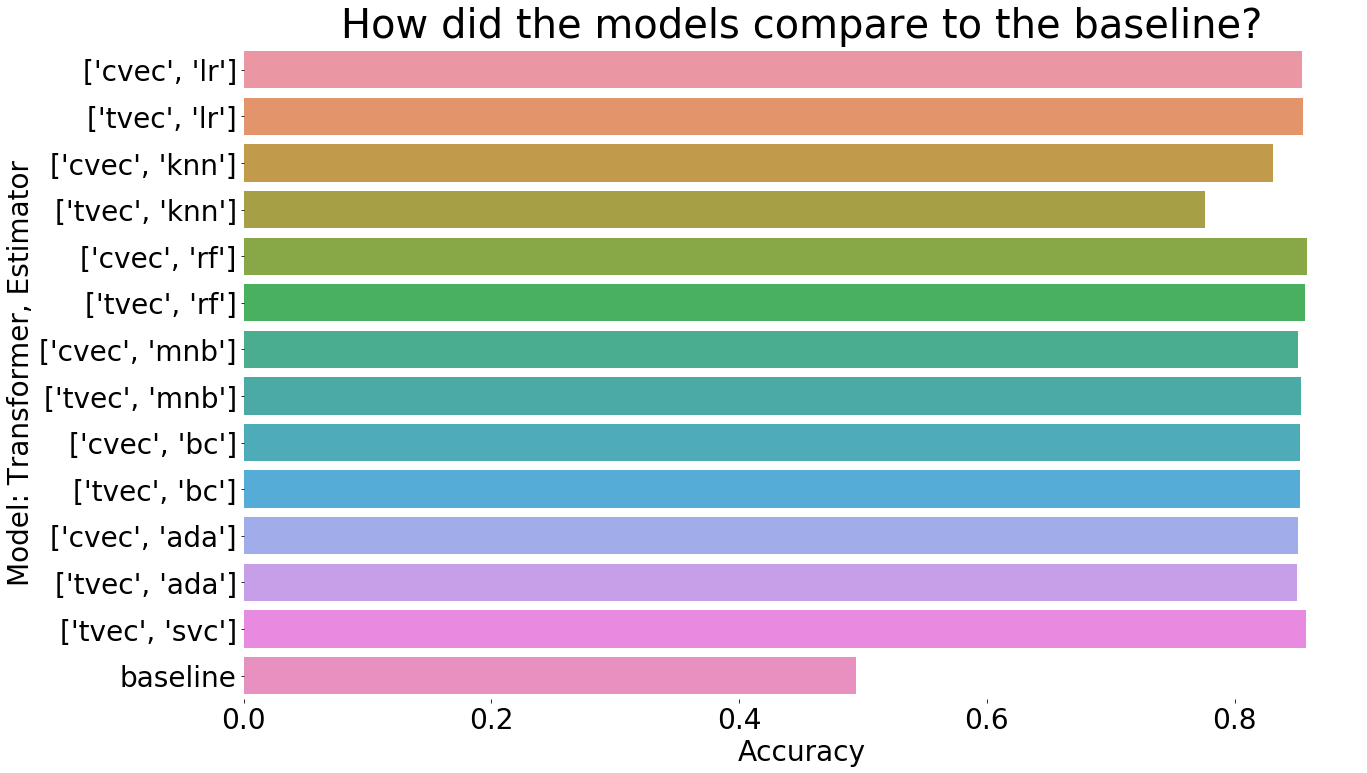

In [290]:
plt.figure(figsize=(20,12))
sns.barplot(data=models_df, x='accuracy', y='type')
plt.xlabel('Accuracy', size=28)
plt.ylabel('Model: Transformer, Estimator', size=28)
plt.yticks(size=28)
plt.xticks(size=28)
plt.title('How did the models compare to the baseline?', size=40)
sns.despine(left=True, bottom=True);